![insomnia](insomnia.jpg)


## 💾 The data

This dataset contains average values for each person calculated over the past six months.The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

In [59]:
import pandas as pd
raw_data = pd.read_csv('sleep_health_data.csv')
raw_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [60]:
# First lets checkout the different occupation among our clients
df=raw_data.copy()
occ=df['Occupation'].unique().tolist()
occ

['Software Engineer',
 'Doctor',
 'Sales Representative',
 'Teacher',
 'Nurse',
 'Engineer',
 'Accountant',
 'Scientist',
 'Lawyer',
 'Salesperson',
 'Manager']

In [61]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [62]:
df.isna().any(axis=1).sum()

0

In [63]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [64]:
#there are no null values so we don't need to deal with them

In [65]:
# Count no of people in each profession
sleep_disorder_pct_map = {}
for cat in occ:
    cat_total=df[df['Occupation']==cat].shape[0]
    cat_sdeprived=df[(df['Occupation']==cat) & (df['Sleep Disorder']!='None')].shape[0]
    pct=round((cat_sdeprived/cat_total)*100)
    sleep_disorder_pct_map[cat]=pct
    print(f"Out of {cat_total} {cat}s ,{cat_sdeprived} are sleep deprived")
    
total=df.shape[0]
sdeprived=df[df['Sleep Disorder']!='None'].shape[0]
print(f"Total Persons:{total}  People with sleep disorder:{sdeprived}")

Out of 4 Software Engineers ,1 are sleep deprived
Out of 71 Doctors ,7 are sleep deprived
Out of 2 Sales Representatives ,2 are sleep deprived
Out of 40 Teachers ,31 are sleep deprived
Out of 73 Nurses ,64 are sleep deprived
Out of 63 Engineers ,6 are sleep deprived
Out of 37 Accountants ,7 are sleep deprived
Out of 4 Scientists ,2 are sleep deprived
Out of 47 Lawyers ,5 are sleep deprived
Out of 32 Salespersons ,30 are sleep deprived
Out of 1 Managers ,0 are sleep deprived
Total Persons:374  People with sleep disorder:155


In [66]:
#Many categories have a very few no of individuals which is not enough to represent their profession so we remove the professions with less than 30 individuals

#significant professions
sig_occ = [ele for ele in occ if (df[df["Occupation"]==ele].shape[0]>30)]
sig_occ

['Doctor',
 'Teacher',
 'Nurse',
 'Engineer',
 'Accountant',
 'Lawyer',
 'Salesperson']

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
sig_pct_map = {key: value for key, value in sleep_disorder_pct_map.items() if key in sig_occ}

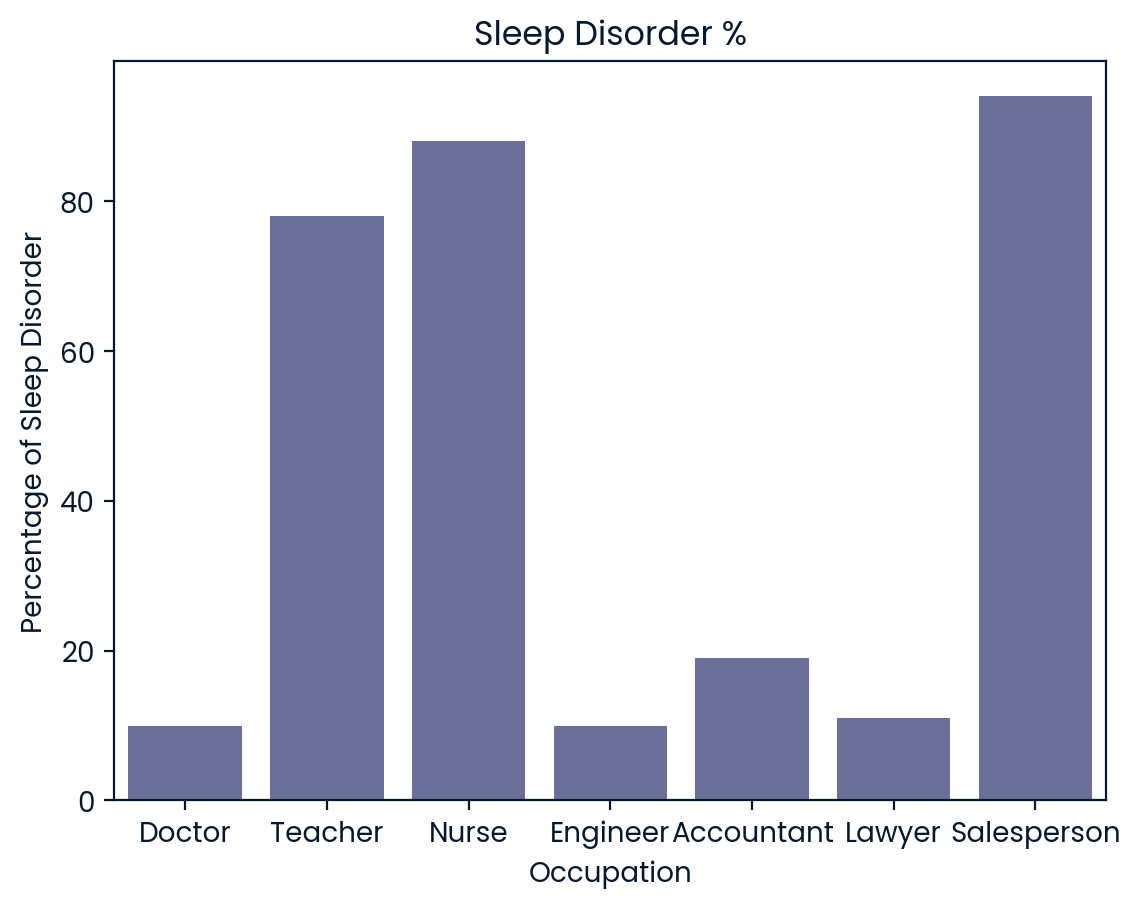

In [69]:
#Visualise %of people in a particular occupation who are suffering from any sleep disorder

sns.barplot(x=list(sig_pct_map.keys()), y=list(sig_pct_map.values()))
plt.xlabel('Occupation')
plt.ylabel('Percentage of Sleep Disorder')
plt.title('Sleep Disorder %')
plt.show()

    


### In teachers with restrained working time sleep quality (38%), experiences of failure at work, social exclusion, and emotional dissonance were more frequent than in teachers with unrestrained working time sleep quality. Groups did not differ in time-related stressors, time control and social support from supervisors. Emotion work, social exclusion and individual experience of failure seem to challenge sleep quality in teachers.
![teacher_sleep](teacher_sleep.jpg)
### This includes the need to display emotions as an important feedback to reach educational goals and to establish or maintain a positive climate in the class, as well as the need not to display other emotions that do not fit with learning goals and maintenance of the class climate. Teachers, therefore, often have to show emotions that do not fit their felt emotions,These interactions were shown to include a great deal of emotion work and to be related to teacher burnout.

#### Learn More:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5800866/

#### Shift work is mandatory for 24-hour health care service, and night shifts are more common than in other sectors . Sleep disturbance is a common problem among night shift workers. As a result of the disruption of circadian rhythms caused by shift work, the quality, and quantity of sleep decrease . It has been determined that the night shift can affect not only their personal health but also the quality of their work, their psychological health, and the treatment of their patients and may cause related accidents.
![nurse_sleep](nurse_sleep.jpg)
#### Doctors are better at dealing with sleep because they don't always have to answer an out of work hour call unless it's an emergency and they usually have assistants to take care of the minor tasks. So it's obvious the chances of sleep disorders among them are less likely.

#### Researchers have found that nurses from various medical departments are more likely to experience poor sleep quality due to work stress.
#### Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10281069/

#### Statistically, lawyers are among the most sleepdeprived professionals in the country, and have rates of depression, burnout, substance abuse, and suicide that are two to four times higher than the national average. This [article](https://www.positivepsychologyforlawyers.com/downloads/The_Science_of_Sleep.pdf) examines the connection, and also sheds light on the importance of sleep for lawyers’ work-life satisfaction and physical health. 
![lawyer_sleep](lawyer_sleep.jpg)
#### Still the numbers are quite less in the bar graph indication that this is a biased dataset but still we consider it because we can't shrink the dataset anymore.

In [70]:
#How do sleep disorders depend on age?
age_grp=[30,40,50,60]
age_legend=["21-30","31-40","41-50","51-60"]
age_disorder={}
for age in age_grp:
    
    disorder_cnt=df[(df['Age']<=age) & (df['Age']>age-10) & (df['Sleep Disorder']!='None')].shape[0]
    age_disorder[age]=disorder_cnt
    


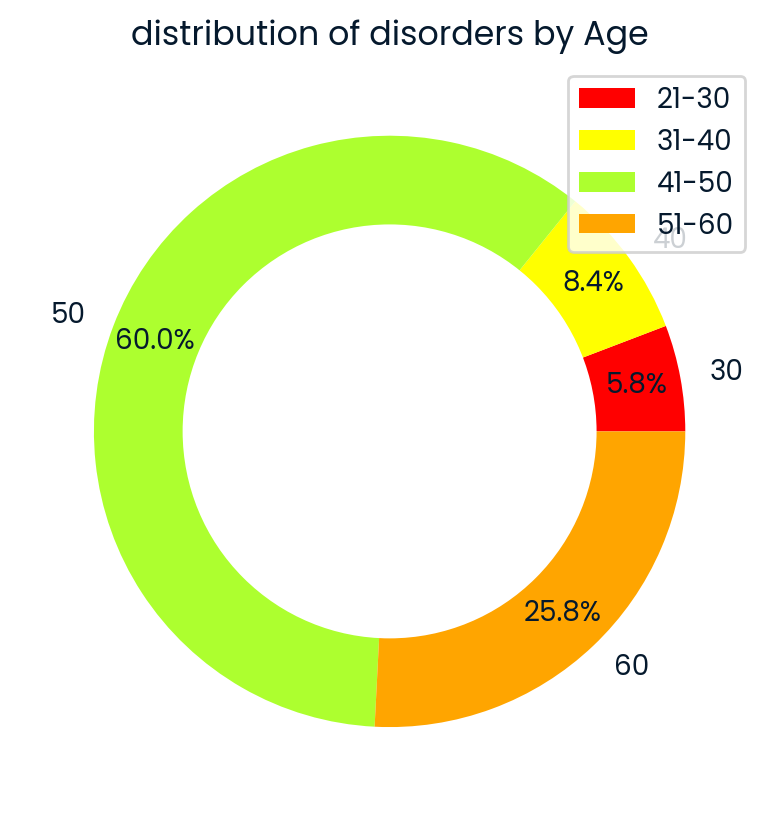

In [71]:
colors = ['#FF0000', '#FFFF00', '#ADFF2F', '#FFA500']

# Pie Chart
plt.pie(age_disorder.values(), colors=colors, labels=age_disorder.keys(),
        autopct='%1.1f%%', pctdistance=0.85,)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('distribution of disorders by Age')
 
# Add Legends
plt.legend(age_legend, loc="upper right")
    
# Displaying Chart
plt.show()

In [72]:

df[['systolic', 'diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Displaying the updated DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [73]:
#Relation of Sleeping Disorders to Systolic and Diastolic Pressure 
#systolic max=140
#diastolic max=95

bp_sys=[120,125,130,140]
bp_dis=[75,80,85,90,95]

#people count above a certain pressure
ppl_syscnt=[]
ppl_discnt=[]

#disorders % above a certain pressure
pnt_sys=[]
pnt_dis=[]

for pressure in bp_sys:
    count_sys = (df['systolic'] >= pressure).sum()
    dor= ( (df['systolic']>=pressure) & (df['Sleep Disorder']!='None')).sum()
    ppl_syscnt.append(count_sys)
    pnt_sys.append(round(dor/count_sys)*100)
    
    
for pressure in bp_dis:
    count_dis = (df['diastolic'] >= pressure).sum()
    dor= ((df['diastolic']>=pressure) & (df['Sleep Disorder']!='None')).sum()
    ppl_discnt.append(count_dis)
    pnt_dis.append(round(dor/count_dis)*100)
    





In [74]:
# Sleep regulates hormones like cortisol—when people are chronically sleep-deprived, the nervous system isn’t able to regulate these hormones which can lead to elevated blood pressure.

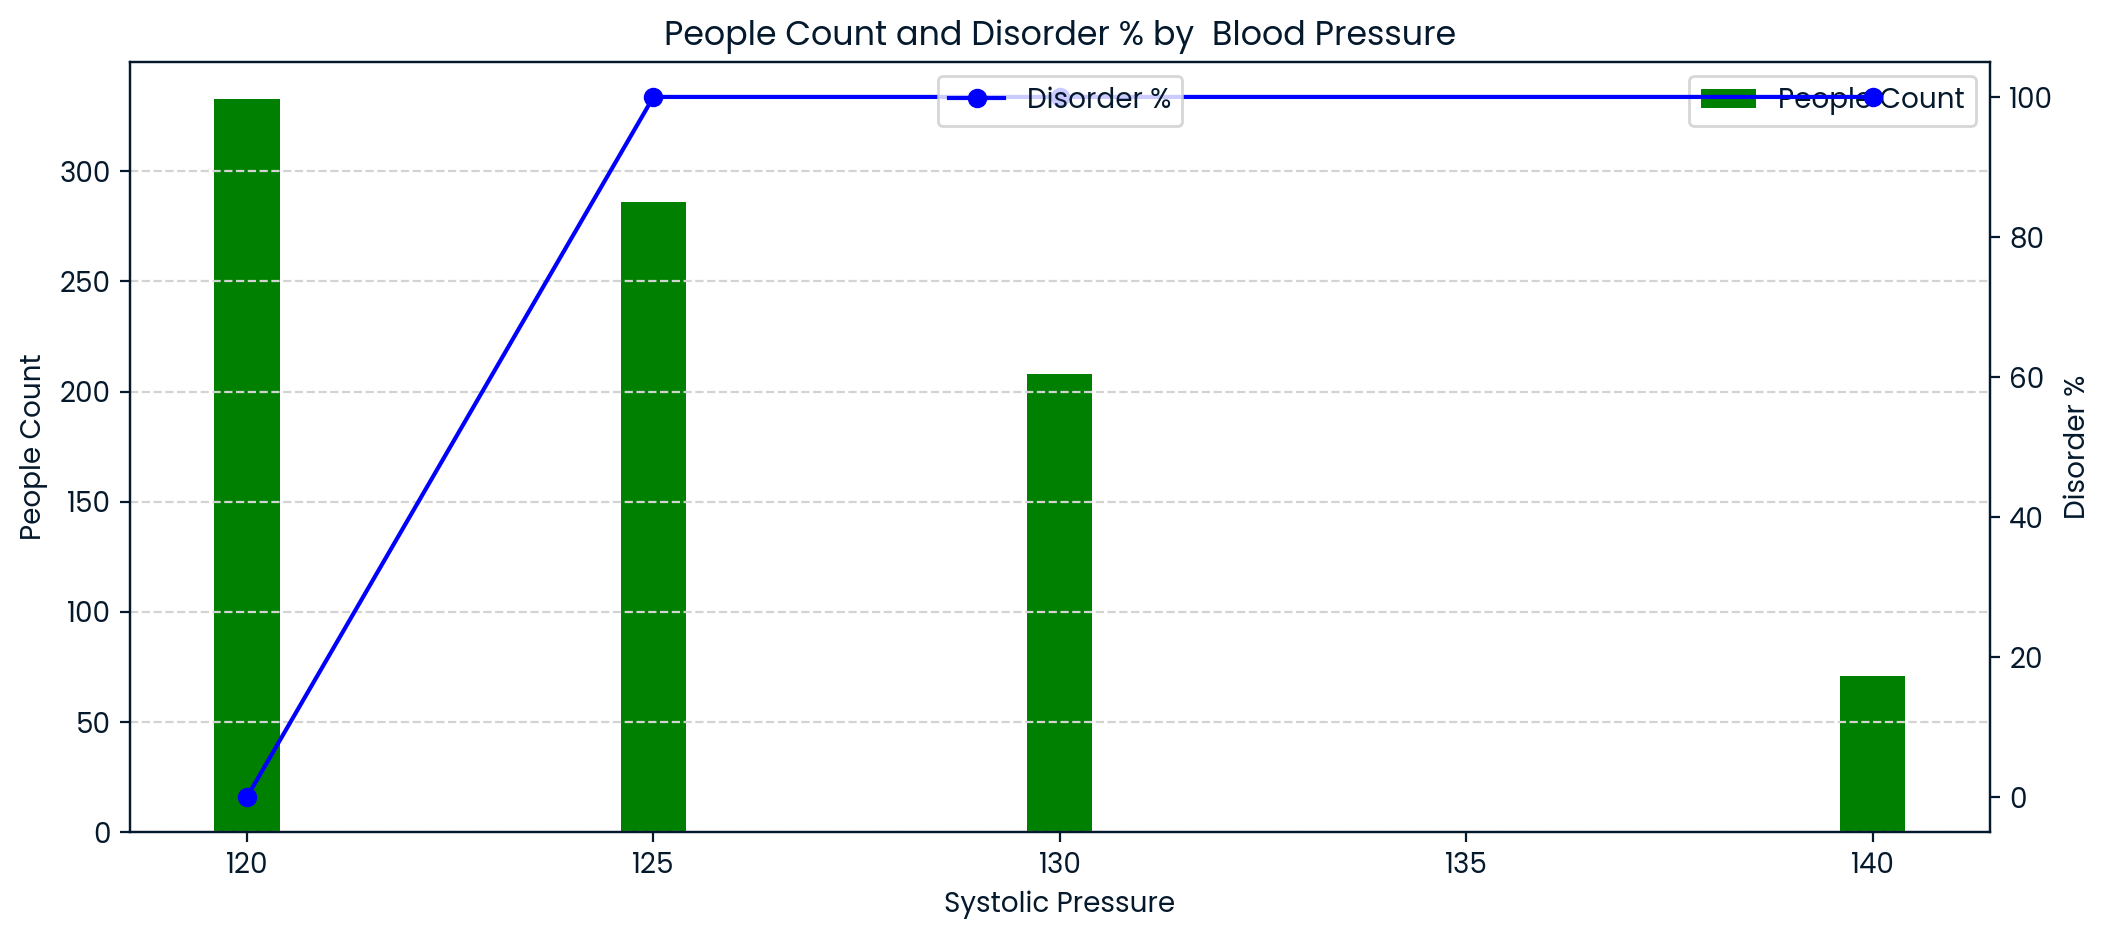

In [75]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('People Count and Disorder % by  Blood Pressure')
ax.set_xlabel('Systolic Pressure')
ax.bar(bp_sys,ppl_syscnt, color='green')
ax2.plot(bp_sys,pnt_sys, color='blue', marker='o')
ax.set_ylabel('People Count')
ax2.set_ylabel('Disorder %')
ax.legend(['People Count'])
ax2.legend(['Disorder %'], loc='upper center')
# ax.set_xticks(gdp['date'].dt.date)
# ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
# plt.tight_layout()
# plt.show()

In [76]:
#We observe there is a strong relation between Blood Pressure and Sleeping Disorder

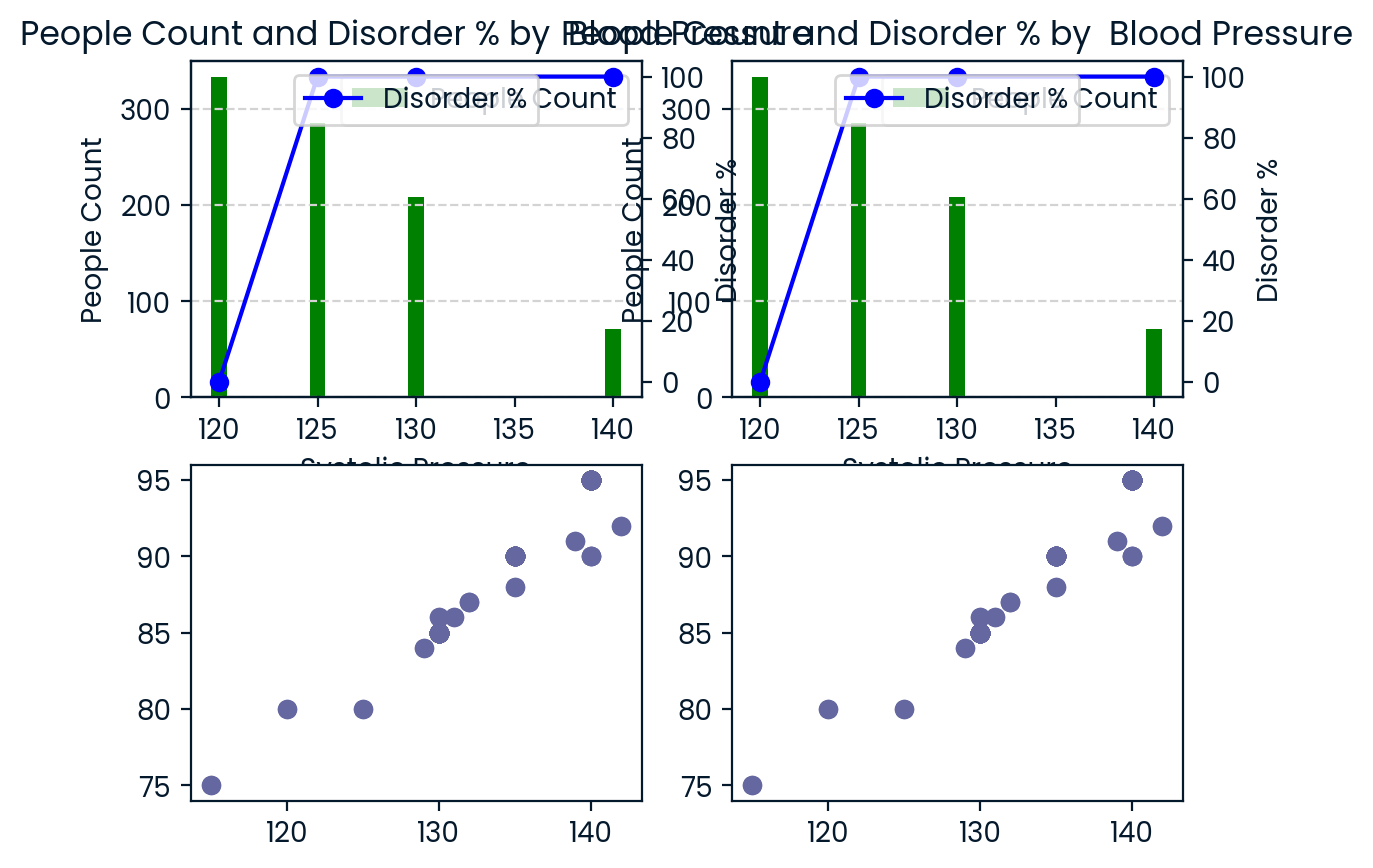

In [77]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax11 = ax1.twinx()
ax1.set_title('People Count and Disorder % by  Blood Pressure')
ax1.set_xlabel('Systolic Pressure')
ax1.bar(bp_sys,ppl_syscnt, color='green')
ax11.plot(bp_sys,pnt_sys, color='blue', marker='o')
ax1.set_ylabel('People Count')
ax11.set_ylabel('Disorder %')
ax1.legend(['People Count'])
ax11.legend(['Disorder %'], loc='upper center')
ax1.yaxis.grid(color='lightgray', linestyle='dashed')

ax22 = ax2.twinx()
ax2.set_title('People Count and Disorder % by  Blood Pressure')
ax2.set_xlabel('Systolic Pressure')
ax2.bar(bp_sys,ppl_syscnt, color='green')
ax22.plot(bp_sys,pnt_sys, color='blue', marker='o')
ax2.set_ylabel('People Count')
ax22.set_ylabel('Disorder %')
ax2.legend(['People Count'])
ax22.legend(['Disorder %'], loc='upper center')
ax2.yaxis.grid(color='lightgray', linestyle='dashed')

scatter_data = df[df['Sleep Disorder'] != 'None']
ax3.scatter(scatter_data['systolic'], scatter_data['diastolic'])

ax4.scatter(scatter_data['systolic'], scatter_data['diastolic'])




In [78]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [79]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

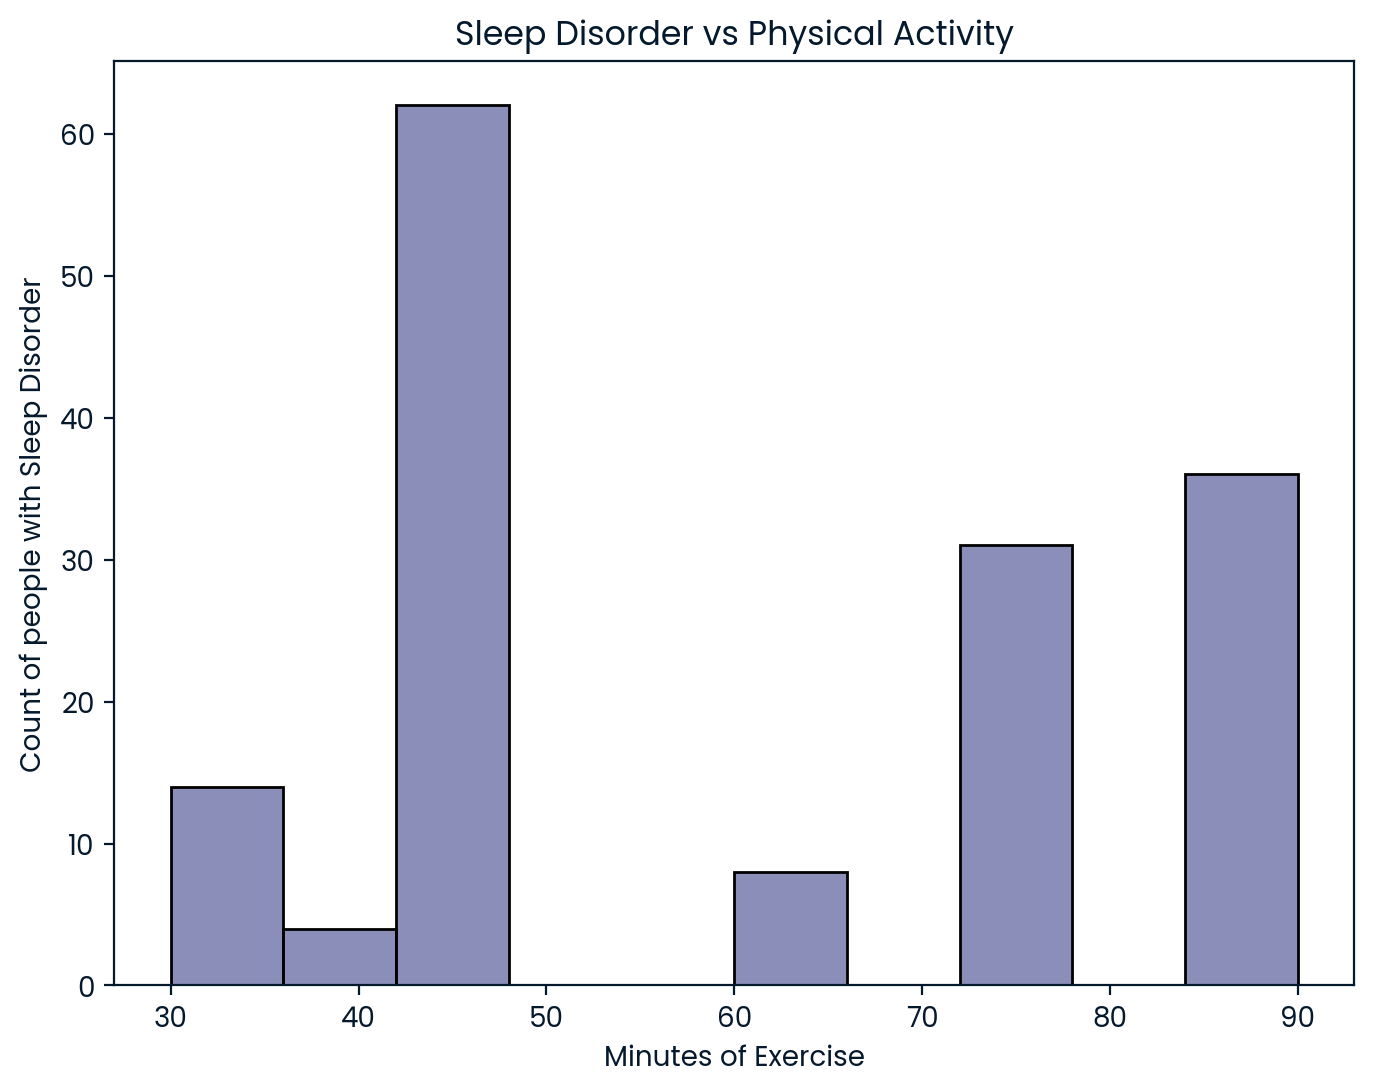

In [80]:
filtered_df = df[df['Sleep Disorder'] != 'None']

# Create histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df['Physical Activity Level'], bins=10, kde=False)
plt.xlabel('Minutes of Exercise')
plt.ylabel('Count of people with Sleep Disorder')
plt.title('Sleep Disorder vs Physical Activity')
plt.show()

In [81]:
type(df.iloc[:,-3])

pandas.core.series.Series

In [82]:
sig_occ

['Doctor',
 'Teacher',
 'Nurse',
 'Engineer',
 'Accountant',
 'Lawyer',
 'Salesperson']

In [83]:
#As the no of categories is small(i.e 3) we can use one-hot encoding here but  sleep apnea and insomnia are not independent of each other they have severall symptoms in common so we will integer encoding

df_copy=df.copy()
df_copy.drop(['Person ID', 'Blood Pressure'], axis = 1,inplace=True)
#we remove the occupations having low representation in the dataset to create balanced train and test datasets
# Create a boolean mask to identify rows with occupation in the sig_occ list
mask = df_copy['Occupation'].isin(sig_occ)
# Filter the DataFrame using the mask
df_ml = df_copy[mask]

df_ml.head()
#df_ml.shape -> 363 x13 


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
7,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80
8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80


In [84]:
#convert Gender and BMI category to numerical data

# Method 1: Using pd.to_numeric
df_ml['Gender'] = pd.to_numeric(df_ml['Gender'].replace({'Male': 0, 'Female': 1}))

# Method 2: Using astype
# df['gender'] = df['gender'].replace({'male': 0, 'female': 1}).astype(int)

df_ml['Gender']


1      0
2      0
6      0
7      0
8      0
      ..
369    1
370    1
371    1
372    1
373    1
Name: Gender, Length: 363, dtype: int64

In [85]:
df_ml['BMI Category'].unique()
# we consider Normal Weight same as Normal i.e. 0

array(['Normal', 'Obese', 'Normal Weight', 'Overweight'], dtype=object)

In [86]:
df_ml['BMI Category'] = pd.to_numeric(df_ml['BMI Category'].replace({'Normal':0,'Normal Weight':0,'Overweight':1,'Obese':2}))
df_ml['BMI Category']

1      0
2      0
6      2
7      0
8      0
      ..
369    1
370    1
371    1
372    1
373    1
Name: BMI Category, Length: 363, dtype: int64

In [87]:
#create one-hot encodings for different occupations
df_ml['Sleep Disorder'].unique()

array(['None', 'Insomnia', 'Sleep Apnea'], dtype=object)

In [88]:
df_cls=df_ml.copy()

In [89]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the 'Occupation' column
one_hot_encoded = ohe.fit_transform(df_ml[['Occupation']])

# Convert the one-hot encoded result to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=ohe.get_feature_names_out(['Occupation']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_ml = pd.concat([df_ml, one_hot_df], axis=1)

# Drop the original 'Occupation' column
df_ml.drop(columns=['Occupation'],inplace=True)

df_ml.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher
1,0.0,28.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,None,125.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,28.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,None,125.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,29.0,6.3,6.0,40.0,7.0,2.0,82.0,3500.0,Insomnia,140.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,29.0,7.8,7.0,75.0,6.0,0.0,70.0,8000.0,None,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,29.0,7.8,7.0,75.0,6.0,0.0,70.0,8000.0,None,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Get the column names
columns = df_ml.columns.tolist()

# Reorder the columns
new_columns = columns[:-10] + columns[-9:] + [columns[-10]]

# Reindex the DataFrame with the new column order
df_ml = df_ml.reindex(columns=new_columns)
df_ml.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic,diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,Sleep Disorder
1,0.0,28.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,125.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None
2,0.0,28.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,125.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None
6,0.0,29.0,6.3,6.0,40.0,7.0,2.0,82.0,3500.0,140.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Insomnia
7,0.0,29.0,7.8,7.0,75.0,6.0,0.0,70.0,8000.0,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None
8,0.0,29.0,7.8,7.0,75.0,6.0,0.0,70.0,8000.0,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None


In [91]:
df_ml['Sleep Disorder'].unique()

array(['None', 'Insomnia', 'Sleep Apnea', nan], dtype=object)

In [92]:
df_ml['Sleep Disorder'].isna().sum()

11

In [93]:
# df_ml.isna().sum()

In [94]:
df_cls['Occupation'].unique()

array(['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer',
       'Salesperson'], dtype=object)

In [95]:
# df_ml = df_ml.dropna(subset=['Sleep Disorder'])
df_ml=df_ml.dropna()
df_ml.isna().sum()
# now size=352

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
systolic                   0
diastolic                  0
Occupation_Accountant      0
Occupation_Doctor          0
Occupation_Engineer        0
Occupation_Lawyer          0
Occupation_Nurse           0
Occupation_Salesperson     0
Occupation_Teacher         0
Sleep Disorder             0
dtype: int64

In [96]:
df_ml['Sleep Disorder'].unique()

array(['None', 'Insomnia', 'Sleep Apnea'], dtype=object)

In [97]:
#The null values have been removed from the dataframe

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_ml['Sleep Disorder'] = label_encoder.fit_transform(df_ml['Sleep Disorder'])
df_ml['Sleep Disorder'] = pd.to_numeric(df_ml['Sleep Disorder'])
df_ml.head()


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic,diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,Sleep Disorder
1,0.0,28.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,125.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,28.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,125.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,0.0,29.0,6.3,6.0,40.0,7.0,2.0,82.0,3500.0,140.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,29.0,7.8,7.0,75.0,6.0,0.0,70.0,8000.0,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,29.0,7.8,7.0,75.0,6.0,0.0,70.0,8000.0,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [99]:
# null_values_df = df_ml[df_ml.isnull().any(axis=1)]
# null_values_df
# Blank so there are no null values

In [100]:
# 0->Insomnia
# 1->None
# 2->Sleep Apnea

In [101]:

sleep_quality_disorder = df_ml[df_ml['Sleep Disorder']!=1].groupby('Stress Level')['Quality of Sleep'].mean()
sleep_quality_disorder

Stress Level
3.0    9.000000
4.0    7.222222
5.0    7.600000
6.0    7.000000
7.0    6.000000
8.0    6.000000
Name: Quality of Sleep, dtype: float64

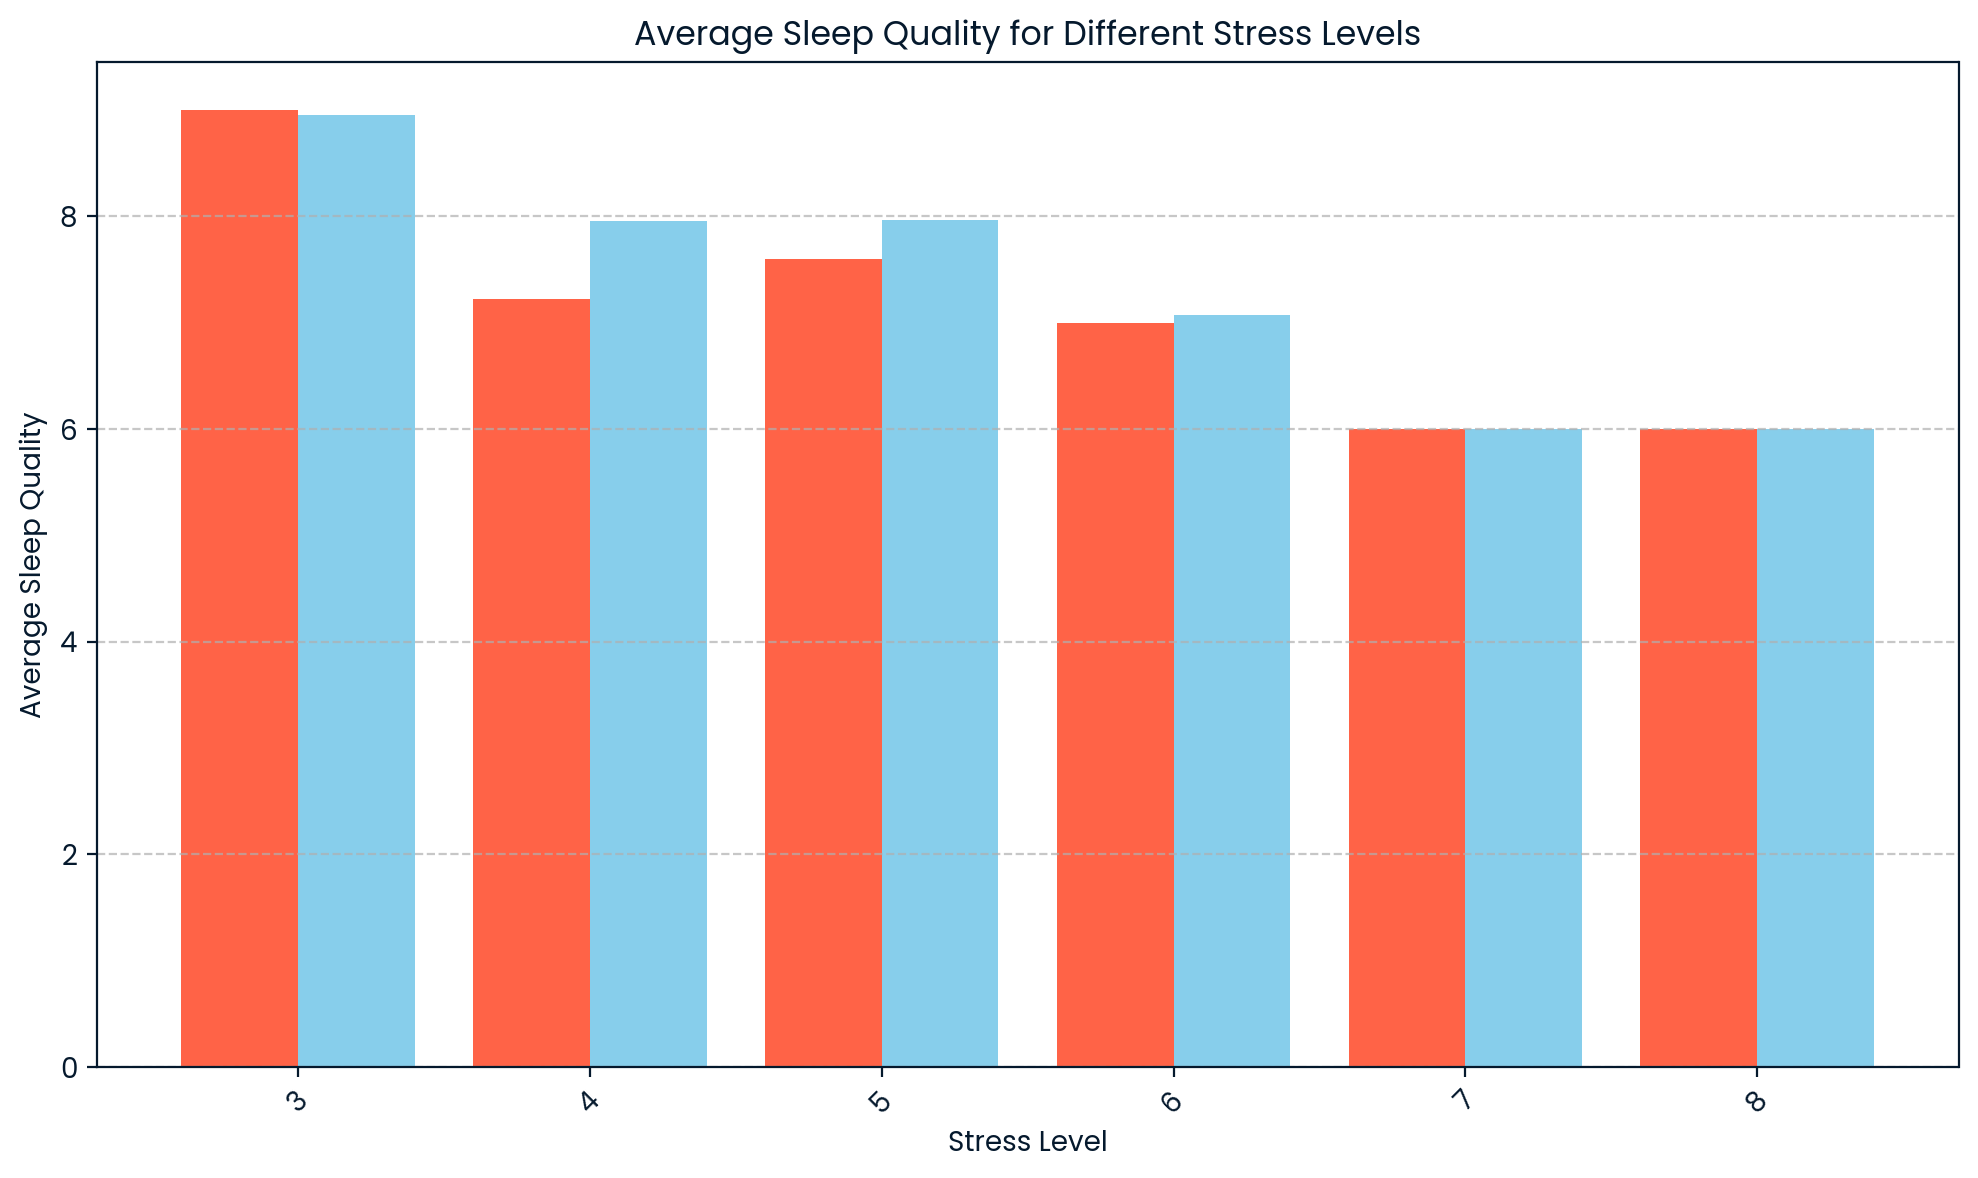

In [102]:
#average sleep quality
sleep_quality_disorder = df_ml[df_ml['Sleep Disorder']!=1].groupby('Stress Level')['Quality of Sleep'].mean()
sleep_quality_healthy  = df_ml[df_ml['Sleep Disorder']==1].groupby('Stress Level')['Quality of Sleep'].mean()
y1=sleep_quality_disorder
y2=sleep_quality_healthy
x=y1.index
width = 0.40
  

# Plotting
plt.figure(figsize=(10, 6))
# sleep_quality_disorder.plot(kind='bar', color='skyblue')
plt.bar(x - 0.2, y1, width, color='tomato', label='Y1 Label')  # Shifted left by 0.2
plt.bar(x + 0.2, y2, width, color='skyblue', label='Y2 Label')  # Shifted right by 0.2
plt.title('Average Sleep Quality for Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We can observe that both healthy(or not having sleep disorder) and people with disorders are having same sleep quality at a particular stress level.
Still we can notice that the sleep quality increase with decrease in stress level which can help prevent sleep disorders.

Now let's do the same with stress level and sleep duration

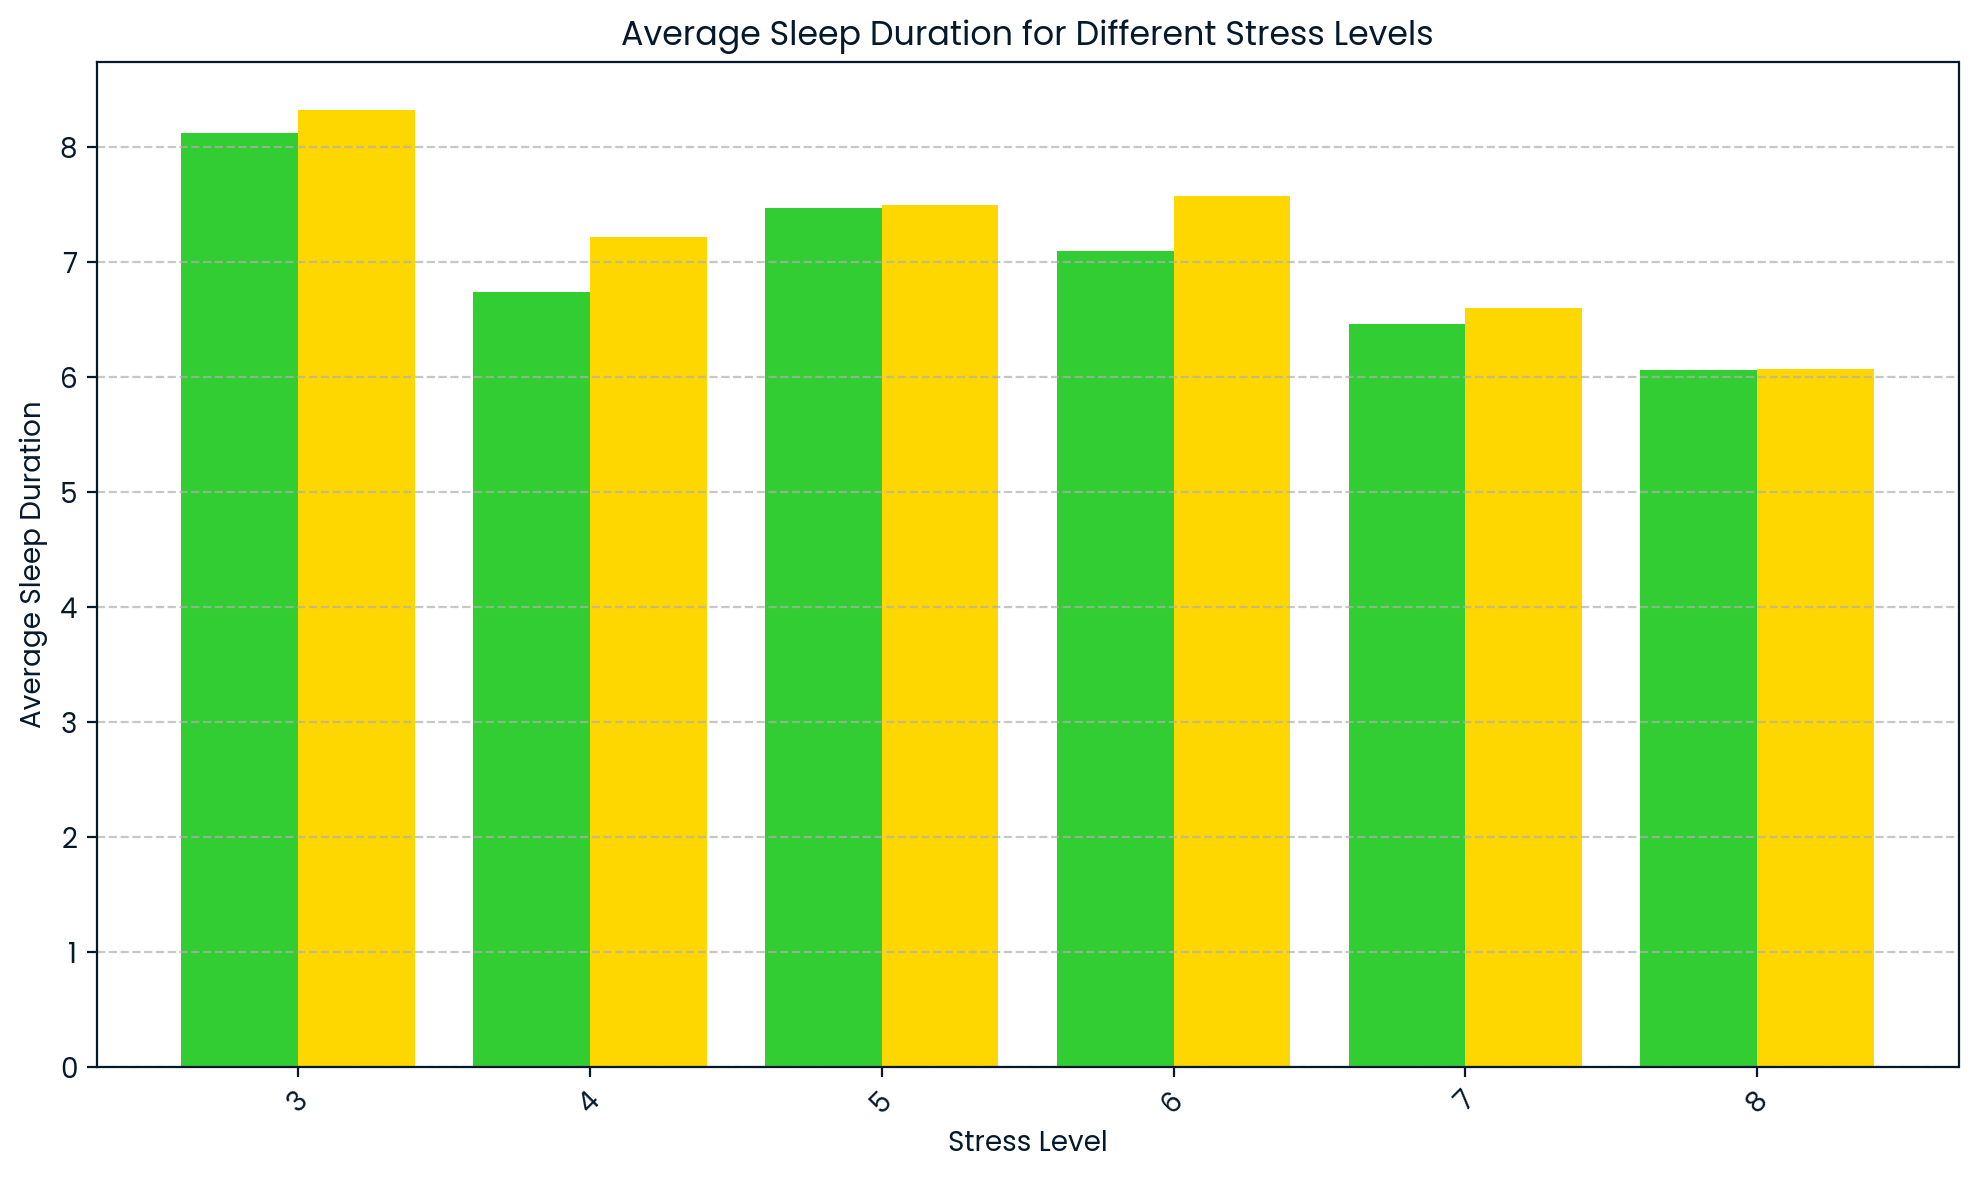

In [103]:
#average sleep quality
sleep_quality_disorder = df_ml[df_ml['Sleep Disorder']!=1].groupby('Stress Level')['Sleep Duration'].mean()
sleep_quality_healthy  = df_ml[df_ml['Sleep Disorder']==1].groupby('Stress Level')['Sleep Duration'].mean()
y1=sleep_quality_disorder
y2=sleep_quality_healthy
x=y1.index
width = 0.40
  

# Plotting
plt.figure(figsize=(10, 6))
# sleep_quality_disorder.plot(kind='bar', color='skyblue')
plt.bar(x - 0.2, y1, width, color='limegreen', label='Y1 Label')  # Shifted left by 0.2
plt.bar(x + 0.2, y2, width, color='gold', label='Y2 Label')  # Shifted right by 0.2
plt.title('Average Sleep Duration for Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Average Sleep Duration')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We can observe that both people with or without disorders have nearly same sleep duration as well so it's not a major indicator of sleep disorders.

In [104]:
df_ml['Daily Steps'].unique()

array([10000.,  3500.,  8000.,  4000.,  4100.,  6800.,  5000.,  7000.,
        5600.,  3300.,  4800.,  4200.,  5500.,  7500.,  7300.,  6200.,
        6000.,  3700.])

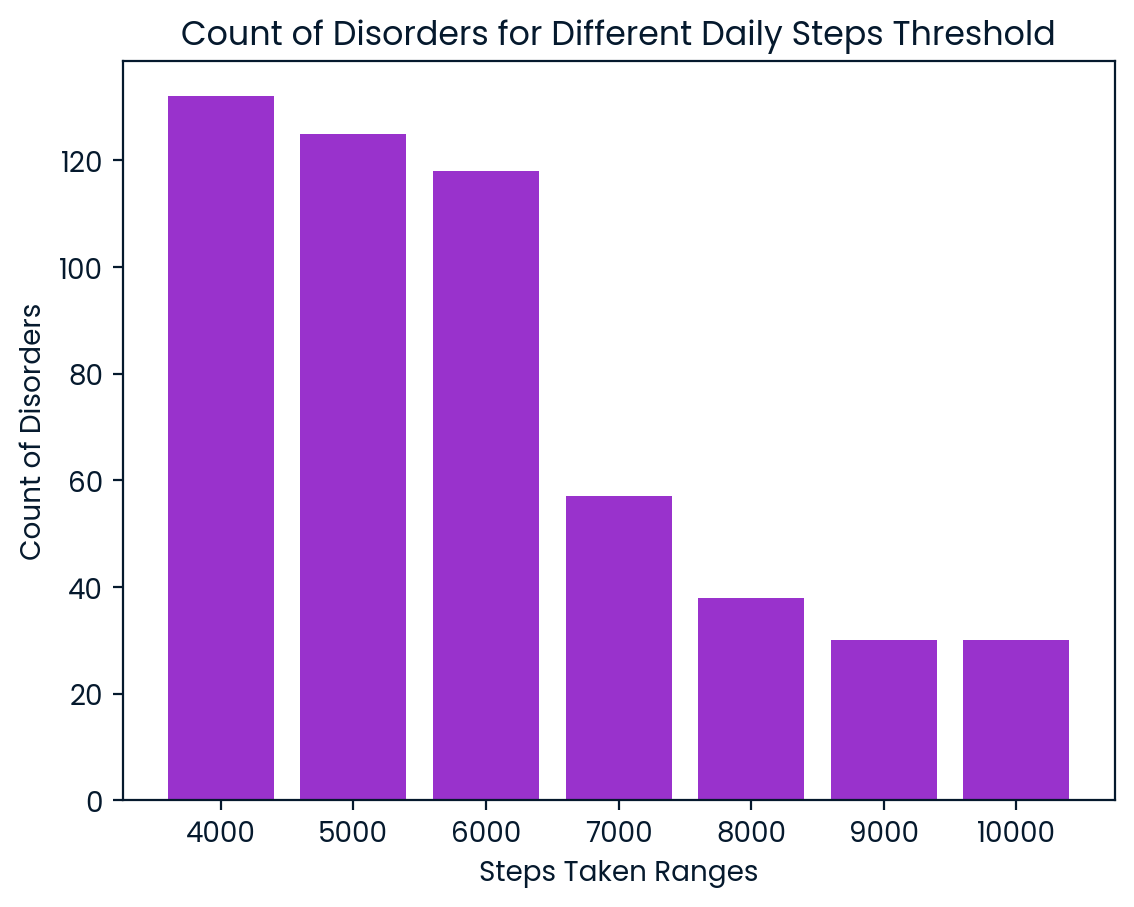

In [105]:
# Define the ranges for steps taken
step_thold = [4000, 5000, 6000, 7000, 8000, 9000,10000]  # Define your desired ranges accordingly

# Filter DataFrame and count occurrences for each range
counts = []
for i in range(len(step_thold)):
    threshold = step_thold[i]
    count = df_ml[(df_ml['Daily Steps'] >= threshold) & (df_ml['Sleep Disorder'] != 1)].shape[0]
    #as 1 represents None
    counts.append(count)
    
# Plotting
plt.bar(range(len(counts)), counts, color='darkorchid')
plt.xlabel('Steps Taken Ranges')
plt.ylabel('Count of Disorders')
plt.title('Count of Disorders for Different Daily Steps Threshold')
plt.xticks(range(len(step_thold)), [f"{step_thold[i]}" for i in range(len(step_thold))])
plt.show()

### The threshold of daily steps for having  healthy sleep can be assumed as  8500 after which the count of disorders decreases significantly as visible from the bar graph. 

Now Lets Do the same with heart rate

In [106]:
df_ml['Heart Rate'].unique()

array([75., 82., 70., 80., 78., 69., 72., 68., 65., 84., 74., 77., 67.,
       73., 83., 86.])

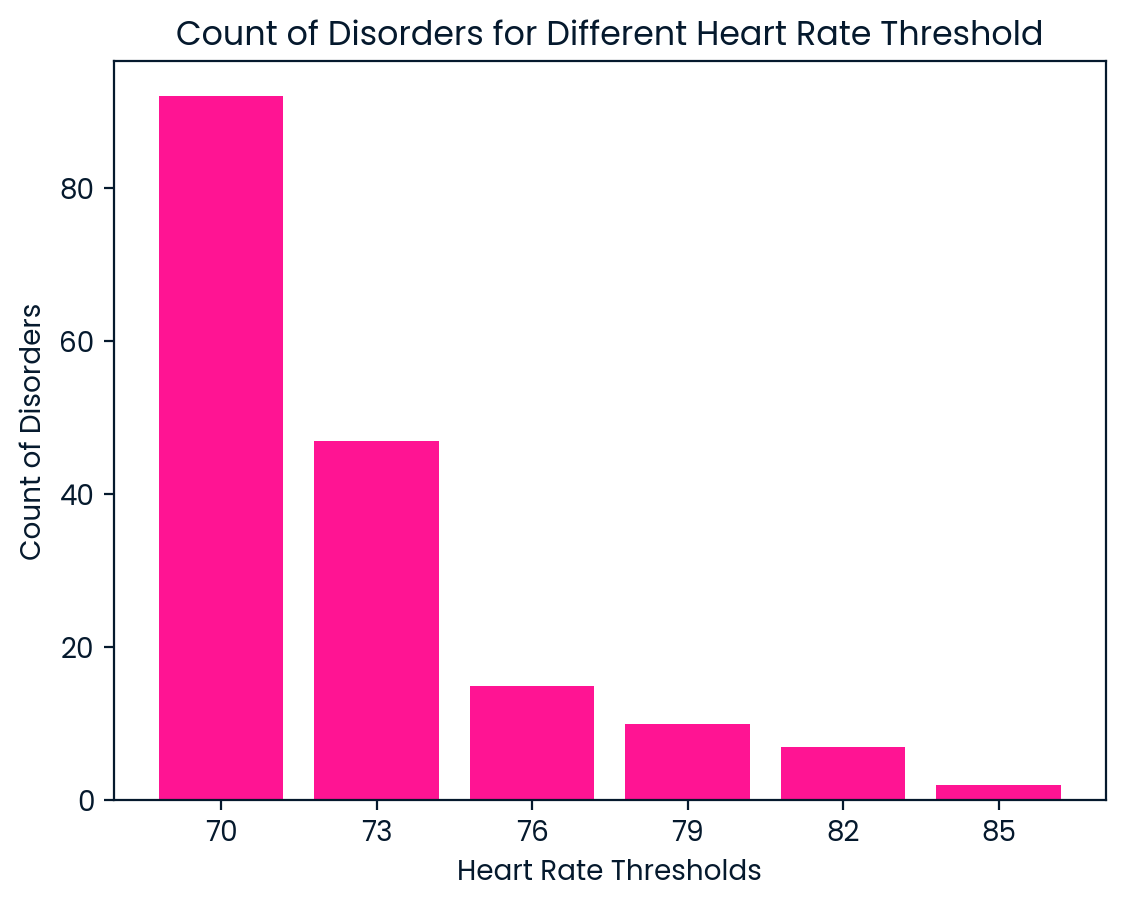

In [107]:
# Define the ranges for steps taken
rate_thold = [70 , 73 , 76, 79 , 82 ,85]  

# Filter DataFrame and count occurrences for each range
counts = []
for i in range(len(rate_thold)):
    threshold = rate_thold[i]
    count = df_ml[(df_ml['Heart Rate'] >= threshold) & (df_ml['Sleep Disorder'] != 1)].shape[0]
    #as 1 represents None
    counts.append(count)
    
# Plotting
plt.bar(range(len(counts)), counts, color='deeppink')
plt.xlabel('Heart Rate Thresholds')
plt.ylabel('Count of Disorders')
plt.title('Count of Disorders for Different Heart Rate Threshold')
plt.xticks(range(len(rate_thold)), [f"{rate_thold[i]}" for i in range(len(rate_thold))])
plt.show()

At first glance it may seem that the plot is wrong or there is some problem with labelling of disorders but the fact is there is very less data for Heart Rate>80. This plot is a result of imbalanced dataset.However, the percentage of disorders increases with the Heart Rate which will be evident from the cells below.

In [108]:
print(df[(df['Heart Rate']>=80) & (df['Sleep Disorder']!='None')].shape[0])
print(df[df['Sleep Disorder']!='None'].shape[0])

15
155


In [109]:
df_ml[df_ml['Heart Rate']>=80].head(20)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic,diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,Sleep Disorder
6,0.0,29.0,6.3,6.0,40.0,7.0,2.0,82.0,3500.0,140.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
16,1.0,29.0,6.5,5.0,40.0,7.0,0.0,80.0,4000.0,132.0,87.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
18,1.0,29.0,6.5,5.0,40.0,7.0,0.0,80.0,4000.0,132.0,87.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
93,0.0,35.0,7.4,7.0,60.0,5.0,2.0,84.0,3300.0,135.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
145,1.0,38.0,7.4,7.0,60.0,5.0,2.0,84.0,3300.0,135.0,88.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
147,0.0,39.0,6.5,5.0,40.0,7.0,1.0,80.0,4000.0,132.0,87.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
264,0.0,48.0,7.3,7.0,65.0,5.0,2.0,83.0,3500.0,142.0,92.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
266,0.0,48.0,7.3,7.0,65.0,5.0,2.0,83.0,3500.0,142.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
276,0.0,49.0,8.1,9.0,85.0,3.0,2.0,86.0,3700.0,139.0,91.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
277,0.0,49.0,8.1,9.0,85.0,3.0,2.0,86.0,3700.0,139.0,91.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


Notice that every person has a disorder for Heart Rate >80. Lets again plot the count but along with the percentage of disorders as a line chart.

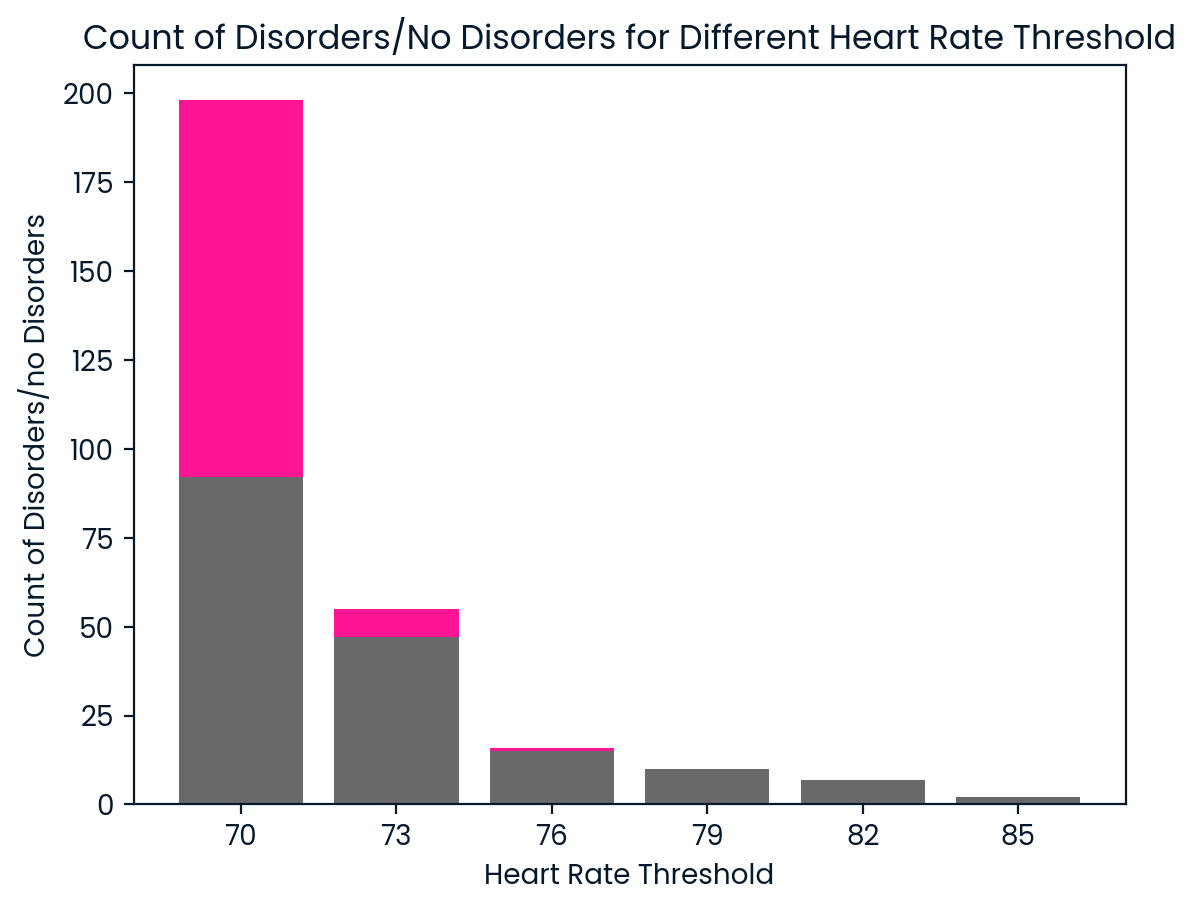

In [110]:
# Define the ranges for steps taken
rate_thold = [70 , 73 , 76, 79 , 82 ,85]  

# Filter DataFrame and count occurrences for each range
disorders = []
healthy = []
for i in range(len(rate_thold)):
    threshold = rate_thold[i]
    disorder_count = df_ml[(df_ml['Heart Rate'] >= threshold) & (df_ml['Sleep Disorder'] != 1)].shape[0]
    #as 1 represents None
    no_disorder = df_ml[(df_ml['Heart Rate'] >= threshold) & (df_ml['Sleep Disorder'] == 1)].shape[0]
    disorders.append(disorder_count)
    healthy.append(no_disorder)

# Plotting
fig,ax = plt.subplots()
ax.bar(range(len(counts)), disorders, color='dimgrey')
ax.bar(range(len(counts)), healthy, bottom =disorders ,color='deeppink')
ax.set_xlabel('Heart Rate Threshold')
ax.set_ylabel('Count of Disorders/no Disorders')
ax.set_title('Count of Disorders/No Disorders for Different Heart Rate Threshold')

ax.set_xticks(range(len(rate_thold)));
ax.set_xticklabels([f"{rate_thold[i]}" for i in range(len(rate_thold))]);


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)



In [112]:
X=df_ml.iloc[:,:-1]
Y=df_ml.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)

In [113]:
logr = LogisticRegression(random_state=23)
logr.fit(X_train,Y_train)
Y_predt = logr.predict(X_train)
classRep = classification_report(Y_train,Y_predt)

print(classRep)

              precision    recall  f1-score   support

           0       0.77      0.41      0.54        58
           1       0.81      0.95      0.87       174
           2       0.84      0.76      0.80        49

    accuracy                           0.81       281
   macro avg       0.81      0.71      0.74       281
weighted avg       0.81      0.81      0.79       281



Accuracy: 0.7887323943661971
F1 Score: 0.8102564102564102


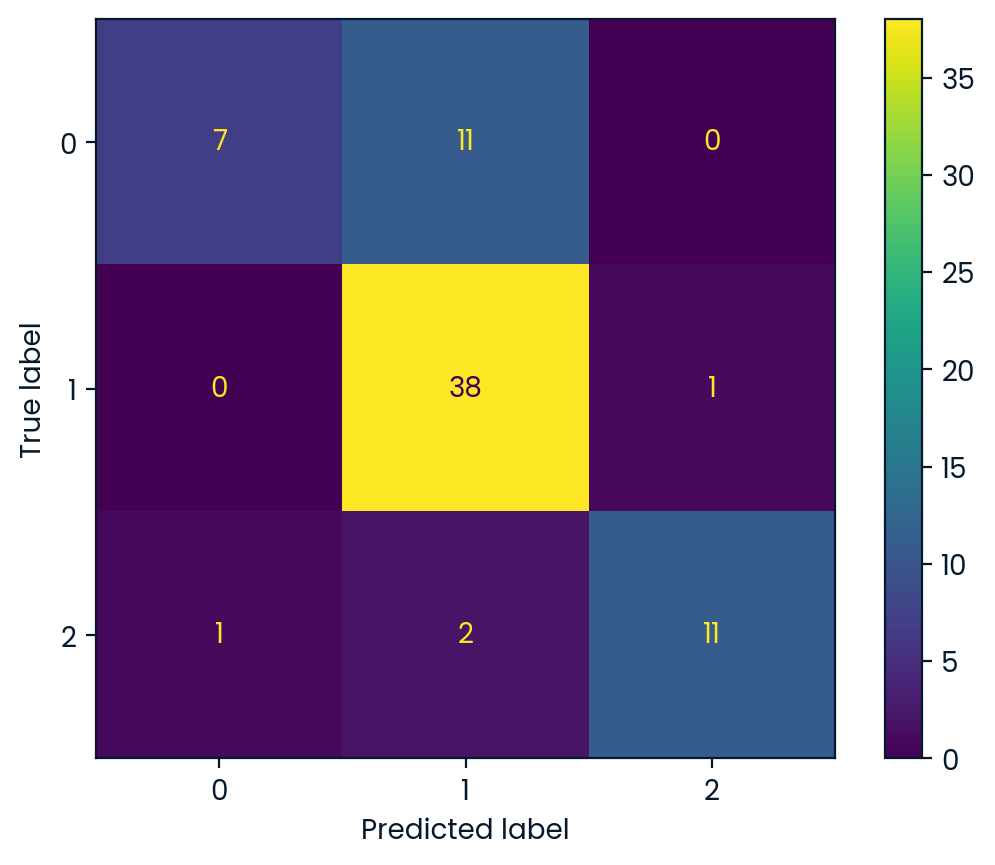

In [114]:
Y_pred = logr.predict(X_test)
accuray = accuracy_score(Y_pred, Y_test)
f1 = f1_score(Y_pred, Y_test, average="weighted")

labels = [0,1,2]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

print("Accuracy:", accuray)
print("F1 Score:", f1)

In [2]:
import pickle as pkl

# #to save it
# with open("train.pkl", "wb") as f:
#     pkl.dump([X_train, Y_train], f)
    
# with open("test.pkl","wb") as f:
#     pkl.dump([X_test,Y_test],f)

#to load it
with open("train.pkl", "rb") as f:
    x_train, y_train = pkl.load(f)
    
with open("test.pkl", "rb") as f:
    x_test, y_test = pkl.load(f)

In [118]:
x_test.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic,diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher
160,0.0,39.0,7.2,8.0,60.0,5.0,0.0,68.0,8000.0,130.0,85.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
179,0.0,42.0,7.8,8.0,90.0,5.0,0.0,70.0,8000.0,130.0,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
101,1.0,36.0,7.2,8.0,60.0,4.0,0.0,68.0,7000.0,115.0,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
310,1.0,52.0,6.6,7.0,45.0,7.0,1.0,72.0,6000.0,130.0,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
309,1.0,52.0,6.6,7.0,45.0,7.0,1.0,72.0,6000.0,130.0,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Combine feature datasets
X = np.concatenate((X_train, X_test), axis=0)

# Combine target datasets
Y = np.concatenate((Y_train, Y_test), axis=0)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf_classifier, X, Y, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')



Cross-Validation Results (Accuracy): [0.81690141 0.91549296 0.9        0.91428571 0.94285714]
Mean Accuracy: 0.897907444668008


Train Accuracy: 0.9572953736654805
Train F1 Score: 0.9572953736654805
Test Accuracy: 0.8450704225352113
Test F1 Score: 0.8410734678340313


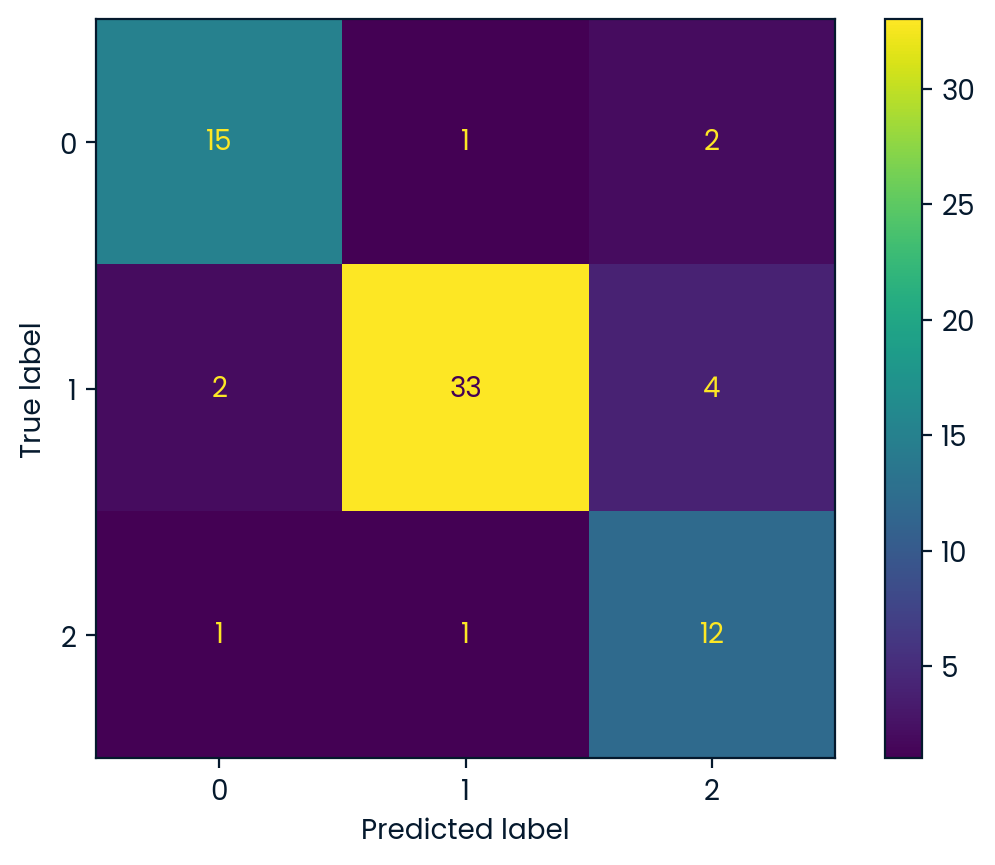

In [126]:
rf_classifier.fit(X_train,Y_train)
rf_predt = rf_classifier.predict(X_train)
train_acc = accuracy_score(rf_predt,Y_train)
train_f1 = f1_score(rf_predt,Y_train,average="weighted")

rf_pred = rf_classifier.predict(X_test)
test_acc = accuracy_score(rf_pred, Y_test)
test_f1 = f1_score(rf_pred, Y_test, average="weighted")

labels = [0,1,2]
cm = confusion_matrix(Y_test, rf_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

print("Train Accuracy:", train_acc)
print("Train F1 Score:", train_f1)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", test_f1)

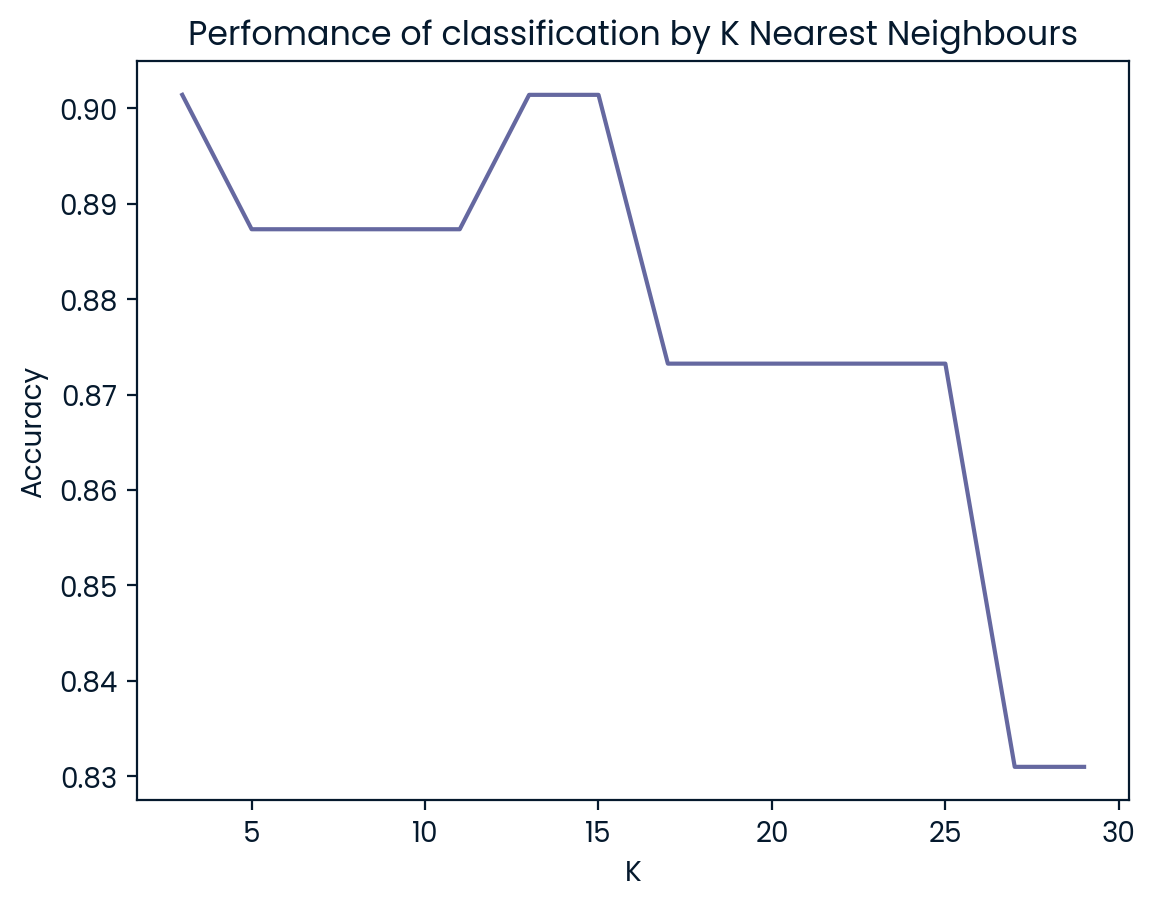

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc[k] = accuracy_score(y_test, y_pred)
    
# PLotting K v/s accuracy graph
plt.plot(range(3,30,2), acc.values())
plt.title('Perfomance of classification by K Nearest Neighbours')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


### Logistic Regression has the lowest accuracy among the following because of reasons mentioned below:

#### - **Linear Decision Boundary:** Logistic Regression assumes a linear relationship between the features and the target variable. If the relationship between features and target is more complex, LR may struggle to capture it accurately.
#### - **Limited Representation**: If the data has non-linear relationships, logistic regression may not be able to capture them effectively, leading to lower accuracy compared to non-linear models like Random Forest and KNN.

### Random Forests being more complex than logistic regression outperforms it due to its features:

#### - **Non-linear Decision Boundaries:** Random Forest can model complex, non-linear relationships between features and target, allowing it to capture more intricate patterns in the data compared to Logistic Regression.
#### - **Robust to Overfitting:** Random Forest tends to be less prone to overfitting compared to individual decision trees, thanks to techniques like bagging and random feature selection.

### Even though Random Forests is immune to overfitting to certain extent but this dataset turns out to be too simple for it and K Nearest Neighbours has the best accuracy among these because:

#### - **Dataset Characteristics:** KNN performs well when the decision boundary is complex and not easily separable by linear or even non-linear methods. If the dataset has clusters of points with different classes and these clusters are well-separated, KNN can effectively capture these patterns by considering the local neighborhoods. Random Forest, on the other hand, constructs decision boundaries based on splits in feature space, which may not be as effective in capturing complex local patterns.

#### - **Model Complexity:** While Random Forest is an ensemble of decision trees, it still relies on individual trees to make predictions. If the dataset is noisy or has a lot of irrelevant features, individual decision trees in the Random Forest can still overfit to the training data. KNN, being a non-parametric method, doesn't make strong assumptions about the underlying data distribution and can adapt well to complex patterns without overfitting